In [1]:
import pandas as pd
import numpy as np
import re 

In [2]:
df = pd.read_csv('data.csv')
df = df.drop(columns=['username'])
df.head()

,text,likes
0,lsrael killed 350 Palestinians in the last 24 ...,27697
1,The cries of the children of Gaza as they died...,22
2,The killing of Refaat Alareer is a testament t...,2043
3,This is Gaza! If these images have not trouble...,52312
4,💔🇵🇸 Childhood in Gaza under the ISRAELI GENOCIDE!,28138


In [3]:
def clean_text(text):
    text = re.sub(r"http\S+", "", text)            
    text = re.sub(r"@\w+", "", text)               
    text = re.sub(r"[^\w\s]", "", text)            
    text = re.sub(r"\s+", " ", text).strip()      
    return text.lower()    

In [4]:
df['cleaned_text'] = df['text'].apply(clean_text)
df = df.drop(columns=['text'])
df.head()


,likes,cleaned_text
0,27697,lsrael killed 350 palestinians in the last 24 ...
1,22,the cries of the children of gaza as they died...
2,2043,the killing of refaat alareer is a testament t...
3,52312,this is gaza if these images have not troubled...
4,28138,childhood in gaza under the israeli genocide


In [5]:
df.to_csv("data_cleaned.csv", index=False)
print("Cleaned data saved to 'data_cleaned.csv'")


Cleaned data saved to 'data_cleaned.csv'


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X_tfidf = vectorizer.fit_transform(df['cleaned_text'])
print(f"TF-IDF shape: {X_tfidf.shape}")
print(f"Example feature names: {vectorizer.get_feature_names_out()[:10]}")


TF-IDF shape: (2000, 1000)
Example feature names: ['10' '100' '1000' '107' '12' '1200' '15' '16' '2023' '21']


In [7]:
from sklearn.decomposition import PCA, NMF
from sklearn.decomposition import KernelPCA

In [8]:
pca = PCA(n_components=50) 
X_pca = pca.fit_transform(X_tfidf.toarray())

In [9]:
kpca = KernelPCA(n_components=50, kernel='rbf')
X_kpca = kpca.fit_transform(X_tfidf.toarray())

In [10]:
nmf = NMF(n_components=50, random_state=42)
X_nmf = nmf.fit_transform(X_tfidf)

In [11]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

In [12]:
kmeans = KMeans(n_clusters=2, random_state=42)
df['kmeans'] = kmeans.fit_predict(X_pca)

C:\Users\mahdi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\mahdi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.2544.0_x64__qbz5n2kfra8p0\Lib\subprocess.py", line 550, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^

In [26]:
kmeans = KMeans(n_clusters=2, random_state=42)
df['kmeans'] = kmeans.fit_predict(X_kpca)

In [28]:
kmeans = KMeans(n_clusters=2, random_state=42)
df['kmeans'] = kmeans.fit_predict(X_nmf)

In [25]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(X_pca, df['kmeans'])
print(f'Silhouette Score: {sil_score}')

Silhouette Score: 0.06444301061398237


In [27]:
sil_score = silhouette_score(X_kpca, df['kmeans'])
print(f'Silhouette Score: {sil_score}')

Silhouette Score: 0.06418178318738949


In [29]:
sil_score = silhouette_score(X_nmf, df['kmeans'])
print(f'Silhouette Score: {sil_score}')

Silhouette Score: 0.08358521176407602


In [ ]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(X_pca, df['kmeans'])
print(f'Silhouette Score: {sil_score}')

In [13]:
agglo = AgglomerativeClustering(n_clusters=2)
df['agglo'] = agglo.fit_predict(X_pca)

In [14]:
dbscan = DBSCAN(eps=0.5, min_samples=3)
df['dbscan'] = dbscan.fit_predict(X_pca)

In [15]:
print(df[['cleaned_text', 'kmeans']].head(50))

                                         cleaned_text  kmeans
0   lsrael killed 350 palestinians in the last 24 ...       1
1   the cries of the children of gaza as they died...       1
2   the killing of refaat alareer is a testament t...       1
3   this is gaza if these images have not troubled...       1
4        childhood in gaza under the israeli genocide       1
5                               i am still alive gaza       1
6   only in gaza do you become an orphan and a par...       1
7   this hanukkah we need to rededicate ourselves ...       1
8   new gaza may soon become a bigger war us offic...       1
9                        no difference gaza_geniocide       1
10  schools are being targeted israeli snipers pos...       1
11  at least 100 hamas terrorists captured by idf ...       0
12  another good day for the idf hamas will soon h...       0
13  tiktok banned after i posted videos on how chi...       1
14  openprobe having gained popularity among inter...       1
15  geor

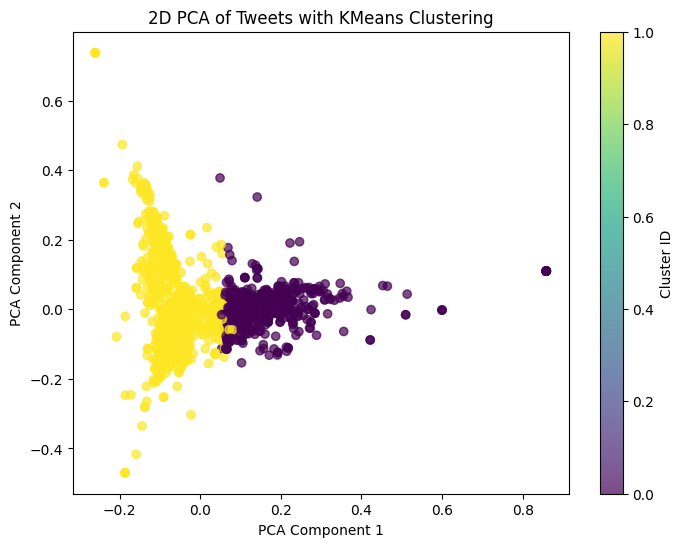

In [16]:
import matplotlib.pyplot as plt

# Use PCA for 2D visualization
pca_2d = PCA(n_components=2).fit_transform(X_tfidf.toarray())

# Plotting KMeans Clusters
plt.figure(figsize=(8, 6))
plt.scatter(pca_2d[:, 0], pca_2d[:, 1], c=df['kmeans'], cmap='viridis', marker='o', alpha=0.7)
plt.title("2D PCA of Tweets with KMeans Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster ID")
plt.show()




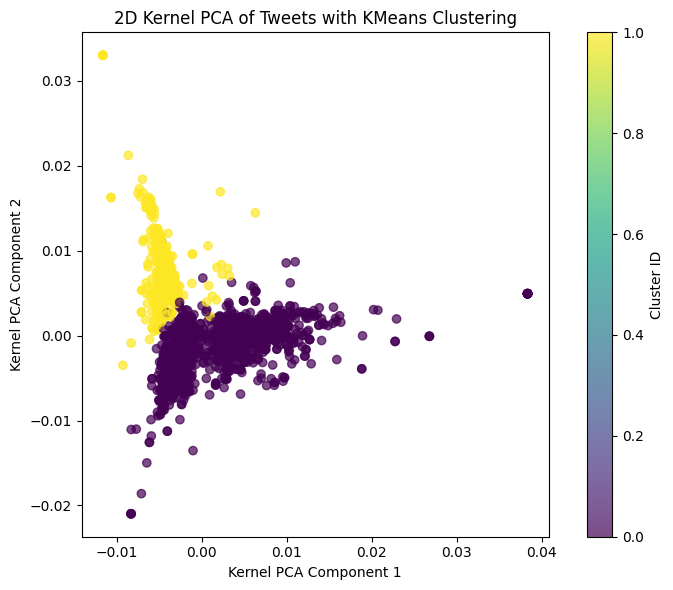

In [32]:
import matplotlib.pyplot as plt

# Create a new figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Scatter plot using Kernel PCA components
scatter = ax.scatter(X_kpca[:, 0], X_kpca[:, 1], c=df['kmeans'], cmap='viridis', marker='o', alpha=0.7)

# Set plot title and labels
ax.set_title("2D Kernel PCA of Tweets with KMeans Clustering")
ax.set_xlabel("Kernel PCA Component 1")
ax.set_ylabel("Kernel PCA Component 2")
ax.set_aspect('equal')

# Add a colorbar
plt.colorbar(scatter, label="Cluster ID")

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


In [17]:
# Extract top terms for each cluster
def get_top_terms_per_cluster(vectorizer, clf, n_terms=10):
    df_clusters = pd.DataFrame()
    for i in range(2):  # For each cluster
        # Get indices of samples in cluster i
        indices = np.where(df['kmeans'] == i)[0]
        # Get the most common terms in these samples
        tfidf_means = np.array(X_tfidf[indices].mean(axis=0)).flatten()
        top_indices = tfidf_means.argsort()[-n_terms:][::-1]
        top_terms = vectorizer.get_feature_names_out()[top_indices]
        df_clusters[f'Cluster {i}'] = top_terms
    return df_clusters

top_terms_df = get_top_terms_per_cluster(vectorizer, kmeans)
print(top_terms_df)

    Cluster 0     Cluster 1
0       hamas          gaza
1  terrorists        israel
2      israel     palestine
3   civilians        people
4    hostages       israeli
5         idf      genocide
6        gaza  palestinians
7   surrender      children
8     israeli   palestinian
9    fighters         world


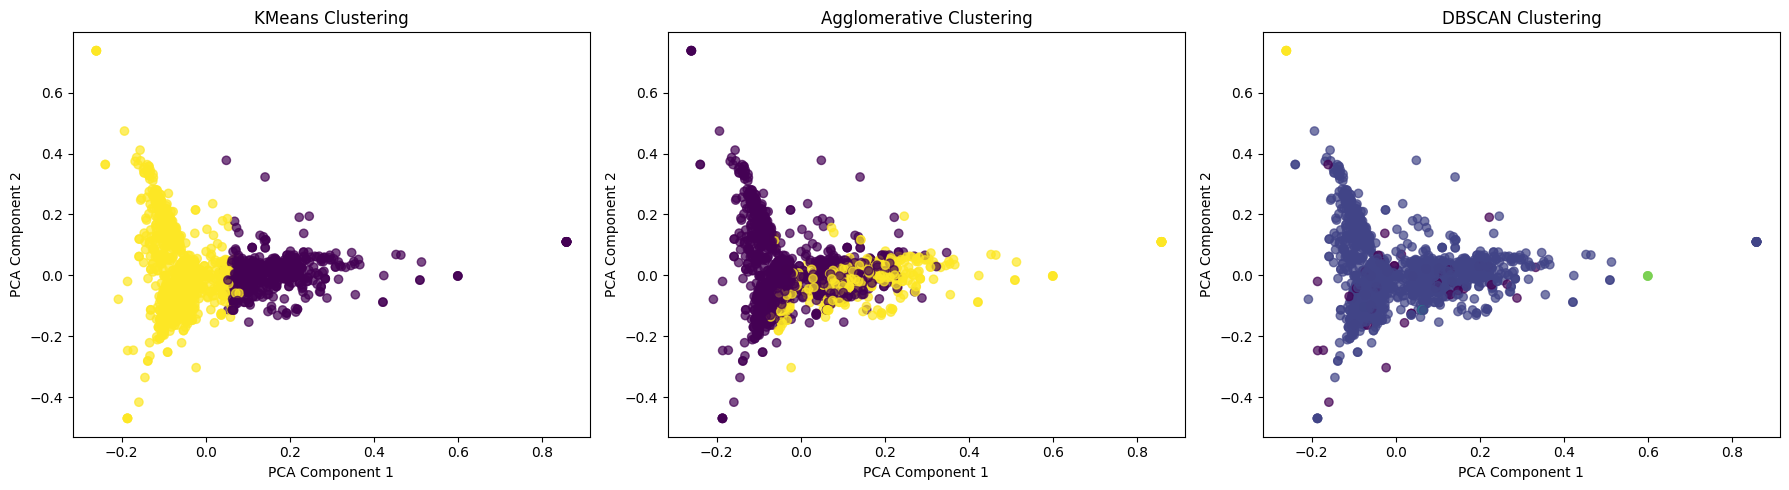

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
algorithms = ['kmeans', 'agglo', 'dbscan']
titles = ['KMeans', 'Agglomerative', 'DBSCAN']

for i, (algo, title) in enumerate(zip(algorithms, titles)):
    axes[i].scatter(pca_2d[:, 0], pca_2d[:, 1], c=df[algo], cmap='viridis', marker='o', alpha=0.7)
    axes[i].set_title(f"{title} Clustering")
    axes[i].set_xlabel("PCA Component 1")
    axes[i].set_ylabel("PCA Component 2")

plt.tight_layout()
plt.show()

KMeans Clustering:
Cluster 0: 513 samples
Cluster 1: 1487 samples
Ratio: 0.34

Cluster 0: 513 samples
Cluster 1: 1487 samples


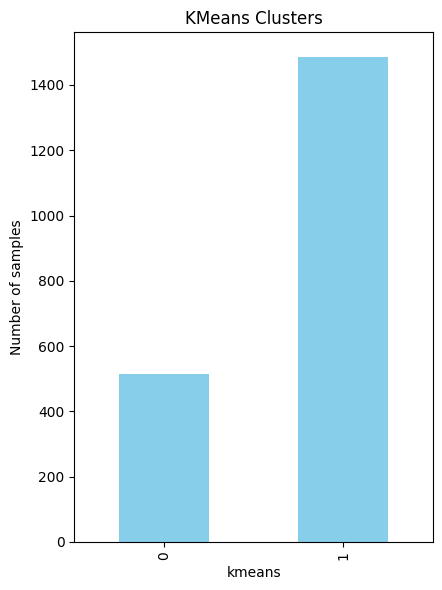

In [20]:
# Count the number of samples in each cluster for K-means
kmeans_counts = df['kmeans'].value_counts().sort_index()
print("KMeans Clustering:")
print(f"Cluster 0: {kmeans_counts[0]} samples")
print(f"Cluster 1: {kmeans_counts[1]} samples")
print(f"Ratio: {kmeans_counts[0]/kmeans_counts[1]:.2f}")
print()




# Print the number of samples in each cluster
for cluster_id, count in kmeans_counts.items():
	print(f"Cluster {cluster_id}: {count} samples")

# Visualize the distribution with a bar chart
plt.figure(figsize=(12, 6))
plt.subplot(131)
kmeans_counts.plot(kind='bar', color='skyblue')
plt.title('KMeans Clusters')
plt.ylabel('Number of samples')


plt.tight_layout()
plt.show()

In [22]:
# Alternative version using pandas DataFrames for nicer display
def get_cluster_samples_df(df, column_name, n_samples=20):
    result_dfs = []
    clusters = sorted(df[column_name].unique())
    
    for cluster in clusters:
        # Get samples from this cluster
        cluster_samples = df[df[column_name] == cluster]['cleaned_text'].sample(
            n=min(n_samples, len(df[df[column_name] == cluster])),
            random_state=42
        ).reset_index(drop=True)
        
        # Create a DataFrame with these samples
        cluster_df = pd.DataFrame({
            f'Cluster {cluster}': cluster_samples
        })
        result_dfs.append(cluster_df)
    
    # Combine all clusters side by side
    # Note: If clusters have different numbers of samples, some cells will be NaN
    return pd.concat(result_dfs, axis=1)

# Display samples as DataFrames
print("KMeans Clustering Samples:")
kmeans_samples_df = get_cluster_samples_df(df, 'kmeans', n_samples=20)
display(kmeans_samples_df)


KMeans Clustering Samples:


,Cluster 0,Cluster 1
0,guess that bbc and cnn said thts babys and chi...,fyi if you are wondering why the acceptance sp...
1,kikar palestine where hamas paraded freed host...,release dr mohammad abu silmiyah medical direc...
2,tonight as jews all over the world celebrate h...,after serving as israels full partner in the g...
3,weve seen horrific reports of sexual assault b...,innalillahiwainnalillahirajiun refaat is one o...
4,israeli perverts are literally documenting the...,refaat alareer as a professor of english liter...
5,hamas seeks pakistans help against israel hama...,never stop talking about palestine freepalesti...
6,staff sergeant alemnew emanuel feleke was an e...,goodbye my friend dr refaat alareer one of gaz...
7,israel murdered this innocent baker who fed hi...,hell yes lets go tears of the kingdom
8,were this close to hamas is in the weed,dont think for a minute that the same regime t...
9,hamas has been luring ambushing israeli soldie...,in tears rashida tlaib the only americanpalest...
